In [183]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
path = os.getcwd()
liste_data = list()
files = os.listdir(path)
for name in files:
    print(name)

.ipynb_checkpoints
data_papers (1).ipynb
dbord.ipynb
papers_count_year_2000.csv
papers_count_year_2001.csv
papers_count_year_2002.csv
papers_count_year_2003.csv
papers_count_year_2004.csv
papers_count_year_2005.csv
papers_count_year_2006.csv
papers_count_year_2007.csv
papers_count_year_2008.csv
papers_count_year_2009.csv
papers_count_year_2010.csv
papers_count_year_2011.csv
papers_count_year_2012.csv
papers_count_year_2013.csv
papers_count_year_2014.csv
papers_count_year_2015.csv
papers_count_year_2016.csv
papers_count_year_2017.csv
papers_count_year_2018.csv
papers_count_year_2019.csv
papers_count_year_2020.csv
papers_count_year_2021.csv


In [185]:
liste_data_paper = [name for name in os.listdir(path) if 'csv' in name]

In [186]:
liste_paper = []
for name in liste_data_paper:
    date = name[-8:-4]
    df = pd.read_csv(name)
    df['Date'] = date
    liste_paper.append(df)

df0 = liste_paper[0]
for i in range(1,len(liste_paper)):
    df1 = pd.concat([df0, liste_paper[i]], join = 'inner')
    df0 = df1

In [187]:
df0['Date'] = pd.to_datetime(df0['Date'], format = '%Y')
df0['count*citations'] = df0['count']*df0['citations']

In [188]:
topic_selec = df0.groupby('topic').sum().sort_values('count', ascending = False).head(15).index
topic_selec = topic_selec.tolist()
filtered_df = df0[df0.topic.isin(topic_selec)]
filtered_df['topic'].unique()

array(['AI', 'Robots', 'Classification', 'Robotics',
       'Pattern Recognition', 'Database', 'Data Mining',
       'Machine Learning', 'Feature Extraction', 'Regression', 'UAM',
       'SVM', 'Big Data', 'Deep Learning', 'Clouds'], dtype=object)

In [189]:
df_paper = filtered_df.pivot(index="Date", columns="topic", values="count*citations").groupby('Date').sum()

In [190]:
df_paper

topic,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
Date,,,,,,,,,,,,,,,
2000-01-01,43817868.0,3388.0,11344635.0,62.0,1821516.0,1096032.0,16.0,1675803.0,609000.0,8607138.0,537852.0,4636472.0,13406800.0,127224.0,22977.0
2001-01-01,42511843.0,11356.0,8713320.0,0.0,1078608.0,2658376.0,1965.0,1123180.0,910178.0,8586382.0,1260846.0,4679280.0,18305562.0,365940.0,20128.0
2002-01-01,59031480.0,41526.0,16864575.0,4.0,2657050.0,2436134.0,150.0,676350.0,1452302.0,16241120.0,2097326.0,6767496.0,20668571.0,542062.0,8998.0
2003-01-01,72763424.0,129072.0,22140000.0,0.0,2357652.0,2847372.0,9716.0,1256334.0,1505149.0,11031810.0,1655637.0,10452909.0,28716436.0,644956.0,35036.0
2004-01-01,74977180.0,15498.0,29543592.0,0.0,5012516.0,6253884.0,3648.0,1974140.0,5546104.0,19789600.0,2411220.0,11128511.0,23375800.0,2486016.0,44022.0
2005-01-01,106859978.0,33669.0,28822477.0,0.0,7625722.0,10729975.0,15624.0,2405135.0,4860986.0,15595124.0,2001495.0,16784625.0,37924379.0,5489275.0,73368.0
2006-01-01,158605824.0,34890.0,57835890.0,0.0,4226475.0,5994317.0,6509.0,2843080.0,20719253.0,17641294.0,4655212.0,19736365.0,49564466.0,4704365.0,192120.0
2007-01-01,154292628.0,30573.0,57487563.0,0.0,8460144.0,8557038.0,10880.0,5773201.0,10923066.0,34509944.0,3730340.0,33217757.0,77062370.0,5894250.0,319410.0
2008-01-01,162784240.0,186354.0,61603106.0,960.0,7173120.0,7322440.0,26850.0,3752480.0,16673040.0,22979352.0,5546408.0,34943425.0,82070188.0,5484600.0,344115.0


In [191]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var for var in variables]
    df.index = [var for var in variables]
    return df
grg_paper = grangers_causation_matrix(df_paper, variables = df_paper.columns)

In [192]:
grg_paper

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,1.0000,0.0001,0.0213,0.0000,0.0000,0.0009,0.0001,0.1163,0.0005,0.0001,0.1628,0.4107,0.4469,0.0001,0.0010
Big Data,0.0015,1.0000,0.0008,0.0000,0.0001,0.0010,0.0000,0.0003,0.0000,0.0024,0.0010,0.0005,0.0006,0.0000,0.0100
Classification,0.0004,0.0000,1.0000,0.0051,0.0000,0.0121,0.0000,0.0000,0.0000,0.0000,0.0001,0.0706,0.0101,0.0005,0.0000
Clouds,0.0213,0.0000,0.0081,1.0000,0.0032,0.3596,0.0000,0.0026,0.0001,0.0048,0.0119,0.0354,0.0320,0.0012,0.0000
Data Mining,0.0300,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0358,0.0000,0.0000,0.0001,0.0000,0.0013,0.0004,0.0000
Database,0.0001,0.0000,0.0010,0.0023,0.0000,1.0000,0.0000,0.2795,0.0033,0.0001,0.0706,0.0040,0.0495,0.0083,0.0004
Deep Learning,0.0108,0.0000,0.0009,0.0000,0.0149,0.0047,1.0000,0.0290,0.0000,0.2229,0.0027,0.0008,0.0077,0.0011,0.0000
Feature Extraction,0.0115,0.0001,0.0005,0.0001,0.0000,0.1665,0.0000,1.0000,0.0001,0.0012,0.0285,0.0701,0.2114,0.0314,0.0000
Machine Learning,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000
Pattern Recognition,0.0005,0.0000,0.0001,0.0000,0.0163,0.0116,0.0021,0.0025,0.0000,1.0000,0.0004,0.0003,0.0011,0.0009,0.0001


In [193]:
grg_paper.values[[np.arange(grg_paper.shape[0])]*2] = np.nan

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/305652682.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_paper.values[[np.arange(grg_paper.shape[0])]*2] = np.nan


In [194]:
grg_paper

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,NaN,0.0001,0.0213,0.0000,0.0000,0.0009,0.0001,0.1163,0.0005,0.0001,0.1628,0.4107,0.4469,0.0001,0.0010
Big Data,0.0015,NaN,0.0008,0.0000,0.0001,0.0010,0.0000,0.0003,0.0000,0.0024,0.0010,0.0005,0.0006,0.0000,0.0100
Classification,0.0004,0.0000,NaN,0.0051,0.0000,0.0121,0.0000,0.0000,0.0000,0.0000,0.0001,0.0706,0.0101,0.0005,0.0000
Clouds,0.0213,0.0000,0.0081,NaN,0.0032,0.3596,0.0000,0.0026,0.0001,0.0048,0.0119,0.0354,0.0320,0.0012,0.0000
Data Mining,0.0300,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0358,0.0000,0.0000,0.0001,0.0000,0.0013,0.0004,0.0000
Database,0.0001,0.0000,0.0010,0.0023,0.0000,NaN,0.0000,0.2795,0.0033,0.0001,0.0706,0.0040,0.0495,0.0083,0.0004
Deep Learning,0.0108,0.0000,0.0009,0.0000,0.0149,0.0047,NaN,0.0290,0.0000,0.2229,0.0027,0.0008,0.0077,0.0011,0.0000
Feature Extraction,0.0115,0.0001,0.0005,0.0001,0.0000,0.1665,0.0000,NaN,0.0001,0.0012,0.0285,0.0701,0.2114,0.0314,0.0000
Machine Learning,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000
Pattern Recognition,0.0005,0.0000,0.0001,0.0000,0.0163,0.0116,0.0021,0.0025,0.0000,NaN,0.0004,0.0003,0.0011,0.0009,0.0001


In [196]:
type(grg_paper)
grg_paper.to_csv('grg_paper.csv', index = True)

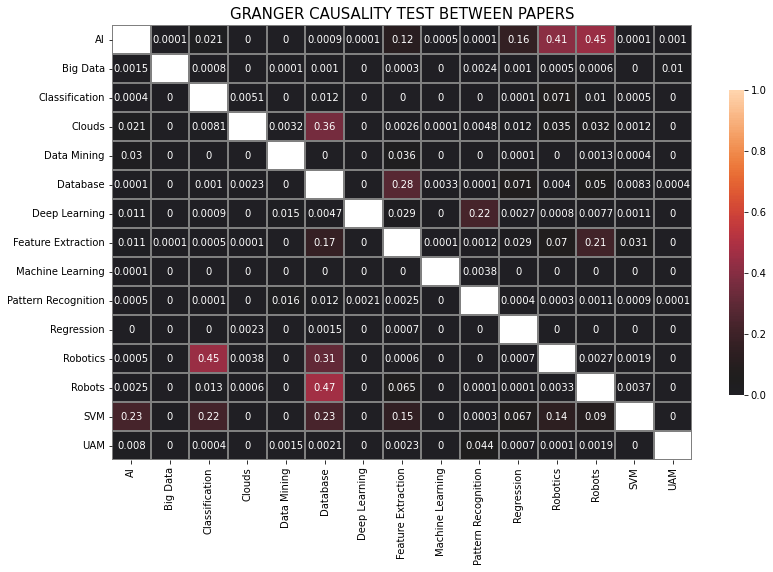

In [107]:
#c = sns.color_palette("Spectral", as_cmap=True)
c=sns.color_palette("icefire", as_cmap=True)
plt.figure(figsize=(13, 8))
plt.title("GRANGER CAUSALITY TEST BETWEEN PAPERS", fontsize = 15)
hm = sns.heatmap(data = grg_paper,
                annot = True,
                linewidths = .2,
                linecolor = "gray",
                cmap= c,#'magma', 
                cbar_kws={"shrink": .70},
                cbar = True,
                 vmax=1,
                center=0.05) # p_value "PiYG") 
  
plt.show()

In [135]:
# df_gr = pd.DataFrame(data = grg_paper.values)
# df_gr.columns = df_paper.columns
# df_gr.index = df_paper.columns


In [14]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import aic
model = VAR(df_paper)
resultats = model.fit(maxlags=0, ic='aic') 
resultats.summary()

C:\Users\33753\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Feb, 2022
Time:                     08:44:03
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    446.465
Nobs:                     22.0000    HQIC:                   445.896
Log likelihood:          -5356.18    FPE:               3.75488e+193
AIC:                      445.721    Det(Omega_mle):    1.92761e+193
--------------------------------------------------------------------
Results for equation AI
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const  123815806.409091  16374500.064636            7.562           0.000

Results for equation Big Data
           coefficient       std. error           t-stat            prob
-------------------------------------------------------------

In [18]:
grg_paper_var = pd.DataFrame(result_var_paper, columns = grg_paper.columns, index = grg_paper.columns)
grg_paper_var

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,1.000000,0.428816,0.871799,0.658399,0.898505,0.880263,0.064010,0.882480,0.528350,0.797909,0.760088,0.838372,0.873001,0.891052,0.384194
Big Data,0.428816,1.000000,0.701771,0.762190,0.325672,0.550442,0.769723,0.529516,0.929162,-0.079955,0.777509,0.667787,0.599716,0.636781,0.945186
Classification,0.871799,0.701771,1.000000,0.862937,0.857520,0.925602,0.377587,0.951142,0.794997,0.574756,0.974143,0.982380,0.977619,0.965331,0.681989
Clouds,0.658399,0.762190,0.862937,1.000000,0.667672,0.760651,0.354605,0.811789,0.753981,0.292989,0.894172,0.860792,0.838154,0.894944,0.675729
Data Mining,0.898505,0.325672,0.857520,0.667672,1.000000,0.937491,-0.036401,0.901018,0.440000,0.834875,0.760140,0.870908,0.894267,0.892514,0.291968
Database,0.880263,0.550442,0.925602,0.760651,0.937491,1.000000,0.222985,0.923234,0.641808,0.684755,0.869662,0.910499,0.922641,0.936706,0.526832
Deep Learning,0.064010,0.769723,0.377587,0.354605,-0.036401,0.222985,1.000000,0.226615,0.834450,-0.336289,0.517349,0.316795,0.278167,0.269514,0.872696
Feature Extraction,0.882480,0.529516,0.951142,0.811789,0.901018,0.923234,0.226615,1.000000,0.656706,0.706985,0.903965,0.936528,0.959059,0.956071,0.521284
Machine Learning,0.528350,0.929162,0.794997,0.753981,0.440000,0.641808,0.834450,0.656706,1.000000,0.054848,0.874460,0.746529,0.706560,0.726250,0.936406
Pattern Recognition,0.797909,-0.079955,0.574756,0.292989,0.834875,0.684755,-0.336289,0.706985,0.054848,1.000000,0.417738,0.577610,0.647471,0.604022,-0.095499


In [197]:
grg_paper_var.values[[np.arange(grg_paper_var.shape[0])]*2] = np.nan
grg_paper_var.to_csv('grg_paper_var.csv', index = True)

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/3807168628.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_paper_var.values[[np.arange(grg_paper_var.shape[0])]*2] = np.nan


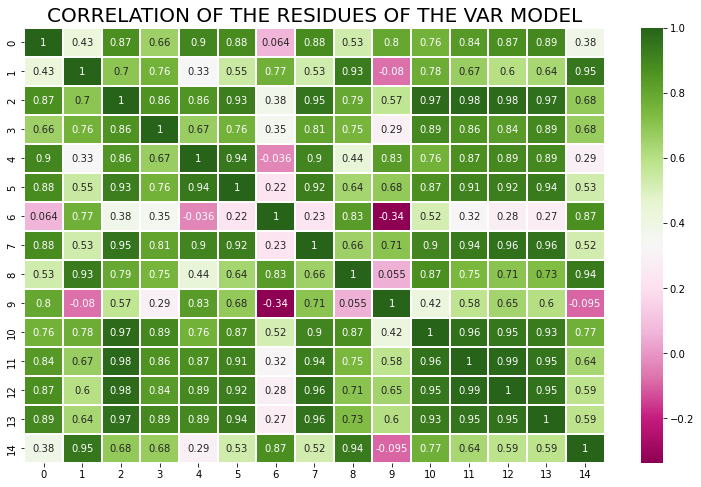

In [17]:
result_var_paper = resultats.resid_corr
# result_var = resultats.resid_corr
# dfs = pd.DataFrame(data = resultats.resid_corr)
# dfs.columns = df_paper.columns
# dfs.index = df_paper.columns

plt.figure(figsize=(13, 8))
plt.title("CORRELATION OF THE RESIDUES OF THE VAR MODEL", fontsize = 20)
hm = sns.heatmap(data = result_var_paper,
                annot = True,
                linewidths = .2,
                cbar = True,
                cmap="PiYG") 
  
plt.show()

# Patent

In [200]:
"C:/Users/33753/Downloads/year/patent/"

'C:/Users/33753/Downloads/year/patent/'

In [201]:
path = "C:/Users/33753/Downloads/year/patent/"
liste_data = list()
files = os.listdir(path)
for name in files:
    print(name)

.ipynb_checkpoints
patent.ipynb
patents_count_year_2000.csv
patents_count_year_2001.csv
patents_count_year_2002.csv
patents_count_year_2003.csv
patents_count_year_2004.csv
patents_count_year_2005.csv
patents_count_year_2006.csv
patents_count_year_2007.csv
patents_count_year_2008.csv
patents_count_year_2009.csv
patents_count_year_2010.csv
patents_count_year_2011.csv
patents_count_year_2012.csv
patents_count_year_2013.csv
patents_count_year_2014.csv
patents_count_year_2015.csv
patents_count_year_2016.csv
patents_count_year_2017.csv
patents_count_year_2018.csv
patents_count_year_2019.csv
patents_count_year_2020.csv


In [202]:
liste_data_patent = [path + name for name in os.listdir(path) if 'csv' in name]

In [203]:
liste_patent = []
for name in liste_data_patent:
    date = name[-8:-4]
    df = pd.read_csv(name)
    df['Date'] = date
    liste_patent.append(df)

df0_patent = liste_patent[0]
for i in range(1,len(liste_patent)):
    df1 = pd.concat([df0, liste_patent[i]], join = 'inner')
    df0_patent = df1

In [204]:
df0_patent['Date'] = pd.to_datetime(df0_patent['Date'])
topic_selec = df0_patent.groupby('topic').sum().sort_values('count', ascending = False).head(15).index
topic_selec = topic_selec.tolist()

In [205]:
filtered_df = df0_patent[df0_patent.topic.isin(topic_selec)]

In [206]:
df_patent = filtered_df.pivot_table(index='Date', columns='topic', values='count', aggfunc=sum)

In [207]:
df_patent.replace([np.nan, -np.inf, np.inf], [0,0,0], inplace = True)

In [208]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var for var in variables]
    df.index = [var for var in variables]
    return df
grg_patent = grangers_causation_matrix(df_patent, variables = df_patent.columns)

In [210]:
grg_patent

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,1.0000,0.0002,0.0001,0.0203,0.0000,0.0059,0.0,0.0103,0.0,0.0000,0.0000,0.0971,0.0000,0.0044,0.0
Big Data,0.0013,1.0000,0.0001,0.0000,0.0001,0.0071,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Classification,0.0000,0.0028,1.0000,0.0001,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Clouds,0.0152,0.0000,0.0095,1.0000,0.0282,0.0000,0.0,0.0423,0.0,0.0000,0.0002,0.2475,0.1349,0.0000,0.0
Data Mining,0.0000,0.0000,0.0000,0.0000,1.0000,0.0001,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0001,0.0
Database,0.0004,0.0010,0.0000,0.0000,0.0000,1.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0002,0.0
Deep Learning,0.0004,0.0000,0.0012,0.0000,0.0000,0.0017,1.0,0.0000,0.0,0.0007,0.0000,0.0001,0.0000,0.0000,0.0
Feature Extraction,0.5768,0.0000,0.0000,0.1000,0.0000,0.0012,0.0,1.0000,0.0,0.0000,0.0000,0.1503,0.0435,0.0031,0.0
Machine Learning,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0002,0.0
Pattern Recognition,0.0000,0.0000,0.0000,0.0023,0.0000,0.0000,0.0,0.0000,0.0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0


In [212]:
# df_gr = pd.DataFrame(data = grg.values)
# df_gr.columns = df_patent.columns
# df_gr.index = df_patent.columns
grg_patent.values[[np.arange(grg_patent.shape[0])]*2] = np.nan

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/365019282.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_patent.values[[np.arange(grg_patent.shape[0])]*2] = np.nan


In [213]:
grg_patent

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,NaN,0.0002,0.0001,0.0203,0.0000,0.0059,0.0,0.0103,0.0,0.0000,0.0000,0.0971,0.0000,0.0044,0.0
Big Data,0.0013,NaN,0.0001,0.0000,0.0001,0.0071,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Classification,0.0000,0.0028,NaN,0.0001,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Clouds,0.0152,0.0000,0.0095,NaN,0.0282,0.0000,0.0,0.0423,0.0,0.0000,0.0002,0.2475,0.1349,0.0000,0.0
Data Mining,0.0000,0.0000,0.0000,0.0000,NaN,0.0001,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0001,0.0
Database,0.0004,0.0010,0.0000,0.0000,0.0000,NaN,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0002,0.0
Deep Learning,0.0004,0.0000,0.0012,0.0000,0.0000,0.0017,NaN,0.0000,0.0,0.0007,0.0000,0.0001,0.0000,0.0000,0.0
Feature Extraction,0.5768,0.0000,0.0000,0.1000,0.0000,0.0012,0.0,NaN,0.0,0.0000,0.0000,0.1503,0.0435,0.0031,0.0
Machine Learning,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0002,0.0
Pattern Recognition,0.0000,0.0000,0.0000,0.0023,0.0000,0.0000,0.0,0.0000,0.0,NaN,0.0000,0.0000,0.0000,0.0000,0.0


In [214]:
grg_patent.to_csv('grg_patent.csv', index = True)

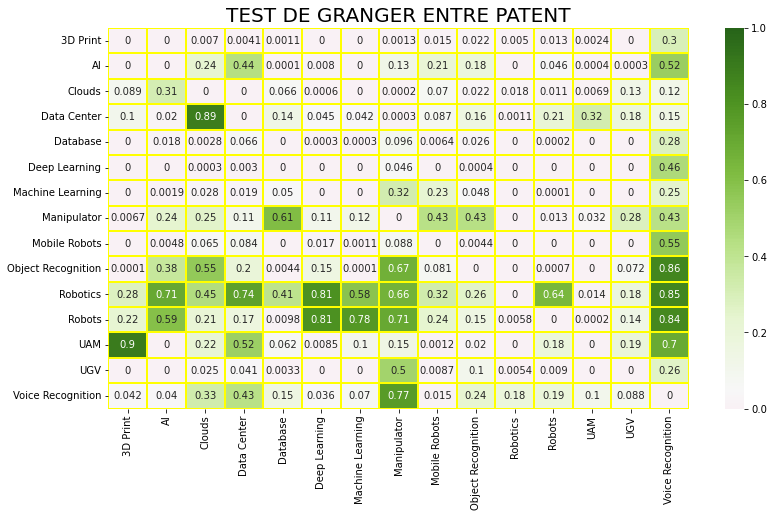

In [88]:
plt.figure(figsize=(13, 7))
plt.title("TEST DE GRANGER ENTRE PATENT", fontsize = 20)
hm = sns.heatmap(data = grg_patent,
                annot = True,
                linewidths = .2,
                linecolor = "yellow",
                cbar = True,
                 vmax=1,
                center=0.05,
                cmap="PiYG") 
  
plt.show()

In [215]:
model_patent = VAR(df_patent)
resultats = model_patent.fit(maxlags=0, ic='aic') 
resultats.summary()

C:\Users\33753\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Feb, 2022
Time:                     10:15:39
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    138.319
Nobs:                     22.0000    HQIC:                   137.750
Log likelihood:          -1966.58    FPE:                5.60478e+59
AIC:                      137.575    Det(Omega_mle):     2.87728e+59
--------------------------------------------------------------------
Results for equation AI
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      3276.590909       367.458445            8.917           0.000

Results for equation Big Data
           coefficient       std. error           t-stat            prob
----------------------------------------------------------------

In [216]:
grg_patent_var = pd.DataFrame(resultats.resid_corr, columns = grg_patent.columns, index = grg_patent.columns)
grg_patent_var

,AI,Big Data,Classification,Clouds,Data Mining,Database,Deep Learning,Feature Extraction,Machine Learning,Pattern Recognition,Regression,Robotics,Robots,SVM,UAM
AI,1.000000,0.743971,0.945245,0.808459,0.973937,0.965898,0.548699,0.971372,0.723122,0.774585,0.874017,0.952562,0.929789,0.940489,0.758461
Big Data,0.743971,1.000000,0.884950,0.844671,0.725977,0.852252,0.891990,0.735014,0.950856,0.222273,0.937422,0.841172,0.709401,0.855826,0.965237
Classification,0.945245,0.884950,1.000000,0.882066,0.943954,0.991163,0.747907,0.950979,0.887805,0.604343,0.980912,0.980132,0.896266,0.990115,0.883305
Clouds,0.808459,0.844671,0.882066,1.000000,0.850840,0.888149,0.570513,0.850006,0.747223,0.551194,0.867913,0.923892,0.884497,0.901189,0.827671
Data Mining,0.973937,0.725977,0.943954,0.850840,1.000000,0.966853,0.505322,0.966691,0.710363,0.790050,0.875838,0.964462,0.924040,0.959456,0.714513
Database,0.965898,0.852252,0.991163,0.888149,0.966853,1.000000,0.684232,0.966778,0.845951,0.659368,0.955975,0.985568,0.917020,0.989431,0.850362
Deep Learning,0.548699,0.891990,0.747907,0.570513,0.505322,0.684232,1.000000,0.539072,0.959202,-0.038612,0.846280,0.634004,0.448576,0.697147,0.865656
Feature Extraction,0.971372,0.735014,0.950979,0.850006,0.966691,0.966778,0.539072,1.000000,0.717404,0.791908,0.879035,0.974246,0.964107,0.949179,0.777478
Machine Learning,0.723122,0.950856,0.887805,0.747223,0.710363,0.845951,0.959202,0.717404,1.000000,0.186450,0.953863,0.805771,0.636730,0.861849,0.910765
Pattern Recognition,0.774585,0.222273,0.604343,0.551194,0.790050,0.659368,-0.038612,0.791908,0.186450,1.000000,0.454093,0.688389,0.796490,0.624629,0.282267


In [219]:
grg_patent_var.values[[np.arange(grg_patent_var.shape[0])]*2] = np.nan
grg_patent_var
grg_patent_var.to_csv('grg_patent_var.csv', index = True)

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/1613643262.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_patent_var.values[[np.arange(grg_patent_var.shape[0])]*2] = np.nan


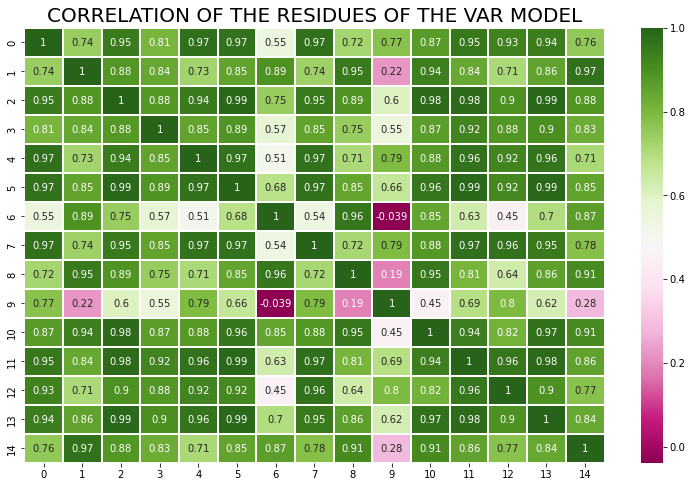

In [82]:
result_var_patent = resultats.resid_corr
# dfp = pd.DataFrame(data = resultats.resid_corr)
# dfp.columns = df_patent.columns
# dfp.index = df_patent.columns

plt.figure(figsize=(13, 8))
plt.title("CORRELATION OF THE RESIDUES OF THE VAR MODEL", fontsize = 20)
hm = sns.heatmap(data = result_var_patent,
                annot = True,
                linewidths = .2,
                cbar = True,
                cmap="PiYG") 
  
plt.show()

# Crosstab

In [284]:
paper_topic_roland = pd.read_csv("C:/Users/33753/Downloads/TransferNow-data2/paper_topic_roland.csv")

In [285]:
df = paper_topic_roland.drop('Unnamed: 0', axis = 1)

In [286]:
df.rename(columns={'new_topics': 'TOPICS', 
                           'new_research_areas': 'INDUSTRY'}, inplace=True)

In [287]:
topic_selec = df['TOPICS'].value_counts()[0:15].index.tolist()
filtered_df = df[df.TOPICS.isin(topic_selec)]
filtered_df['TOPICS'].unique()

array(['AI', 'Machine Learning', 'Robotics', 'Robots', 'UAM',
       'Mobile Robots', 'Database', 'Data Mining', 'SVM',
       'Classification', 'Regression', 'Feature Extraction',
       'Pattern Recognition', 'Deep Learning', 'Convolutional Networks'],
      dtype=object)

In [288]:
topic_selec = filtered_df['INDUSTRY'].value_counts()[0:15].index.tolist()
df_s = filtered_df[filtered_df.INDUSTRY.isin(topic_selec)]
df_s['INDUSTRY'].unique()

array(['Computer Science', 'Engineering', 'Telecommunications',
       'Automation & Control Systems', 'Robotics',
       'Neurosciences & Neurology',
       'Operations Research & Management Science', 'Chemistry',
       'Imaging Science & Photographic Technology', 'Optics',
       'Remote Sensing', 'Radiology, Nuclear Medicine & Medical Imaging',
       'Mathematics', 'Instruments & Instrumentation',
       'Mathematical & Computational Biology'], dtype=object)

In [289]:
df_cross = pd.pivot_table(df_s, index='TOPICS', columns ='INDUSTRY', aggfunc='count')

In [292]:
df_cross['AU']

INDUSTRY,Automation & Control Systems,Chemistry,Computer Science,Engineering,Imaging Science & Photographic Technology,Instruments & Instrumentation,Mathematical & Computational Biology,Mathematics,Neurosciences & Neurology,Operations Research & Management Science,Optics,"Radiology, Nuclear Medicine & Medical Imaging",Remote Sensing,Robotics,Telecommunications
TOPICS,,,,,,,,,,,,,,,
AI,25093,1697,185972,73847,13236,2074,2446,4902,4850,6283,2899,2508,678,44547,5680
Classification,5440,4968,72245,45870,11543,3469,4338,4197,4204,3107,3455,4280,9517,5152,4810
Convolutional Networks,1998,1436,27583,22708,6783,1124,1155,473,1256,589,2274,3329,4596,2356,2479
Data Mining,1029,927,22924,8106,594,316,1060,1605,365,1565,244,214,414,541,1200
Database,1399,1446,24257,14452,3177,571,1884,1089,690,760,1064,1200,953,1525,1831
Deep Learning,1470,1482,24131,17817,3329,1018,1023,592,1351,607,1599,2213,2184,1901,2628
Feature Extraction,1701,731,19841,16713,4709,1247,1072,552,928,502,1337,1178,2700,1501,1921
Machine Learning,3466,3907,50060,26133,2913,1649,3461,3063,3108,2102,1669,2746,2687,2891,4573
Mobile Robots,11029,464,18099,11634,614,1139,131,604,221,345,238,25,141,15639,927


In [227]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=2, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var for var in variables]
    df.index = [var for var in variables]
    return df
grg_cross = grangers_causation_matrix(df_cross['AU'], variables = df_cross['AU'].columns)
grg_cross

,Automation & Control Systems,Chemistry,Computer Science,Engineering,Imaging Science & Photographic Technology,Instruments & Instrumentation,Mathematical & Computational Biology,Mathematics,Neurosciences & Neurology,Operations Research & Management Science,Optics,"Radiology, Nuclear Medicine & Medical Imaging",Remote Sensing,Robotics,Telecommunications
Automation & Control Systems,1.0000,0.4806,0.5050,0.3745,0.3546,0.3971,0.5306,0.6094,0.0131,0.6249,0.2895,0.3277,0.6421,0.0102,0.2504
Chemistry,0.0227,1.0000,0.0000,0.0006,0.0045,0.0253,0.2192,0.0001,0.0090,0.0003,0.0704,0.5828,0.2341,0.0417,0.0324
Computer Science,0.2812,0.1840,1.0000,0.0182,0.5367,0.1372,0.1564,0.1850,0.0327,0.3766,0.6488,0.3945,0.3203,0.1750,0.1985
Engineering,0.5594,0.3769,0.1990,1.0000,0.5290,0.3996,0.2889,0.2009,0.0234,0.7080,0.4570,0.3054,0.2813,0.3892,0.2142
Imaging Science & Photographic Technology,0.0076,0.1734,0.0001,0.0100,1.0000,0.0800,0.4393,0.1115,0.2808,0.0014,0.1720,0.0028,0.0001,0.0104,0.4321
Instruments & Instrumentation,0.0531,0.1370,0.0148,0.0202,0.0610,1.0000,0.1181,0.3655,0.0211,0.1578,0.0483,0.1457,0.0252,0.0460,0.0249
Mathematical & Computational Biology,0.0526,0.0063,0.0000,0.0009,0.0015,0.4255,1.0000,0.0187,0.0659,0.0001,0.0014,0.0110,0.2791,0.0614,0.0020
Mathematics,0.0570,0.0027,0.0003,0.0291,0.3249,0.0203,0.0033,1.0000,0.1894,0.0078,0.7099,0.3083,0.0344,0.0562,0.8611
Neurosciences & Neurology,0.2363,0.0198,0.3676,0.0437,0.5935,0.4434,0.0230,0.8989,1.0000,0.3771,0.1952,0.0366,0.0581,0.2203,0.0261
Operations Research & Management Science,0.0795,0.0040,0.0022,0.0185,0.5429,0.0406,0.0023,0.0249,0.0301,1.0000,0.2693,0.3817,0.1223,0.0491,0.4329


In [228]:
grg_cross.index = df_cross['AU'].index

In [229]:
grg_cross

,Automation & Control Systems,Chemistry,Computer Science,Engineering,Imaging Science & Photographic Technology,Instruments & Instrumentation,Mathematical & Computational Biology,Mathematics,Neurosciences & Neurology,Operations Research & Management Science,Optics,"Radiology, Nuclear Medicine & Medical Imaging",Remote Sensing,Robotics,Telecommunications
TOPICS,,,,,,,,,,,,,,,
AI,1.0000,0.4806,0.5050,0.3745,0.3546,0.3971,0.5306,0.6094,0.0131,0.6249,0.2895,0.3277,0.6421,0.0102,0.2504
Classification,0.0227,1.0000,0.0000,0.0006,0.0045,0.0253,0.2192,0.0001,0.0090,0.0003,0.0704,0.5828,0.2341,0.0417,0.0324
Convolutional Networks,0.2812,0.1840,1.0000,0.0182,0.5367,0.1372,0.1564,0.1850,0.0327,0.3766,0.6488,0.3945,0.3203,0.1750,0.1985
Data Mining,0.5594,0.3769,0.1990,1.0000,0.5290,0.3996,0.2889,0.2009,0.0234,0.7080,0.4570,0.3054,0.2813,0.3892,0.2142
Database,0.0076,0.1734,0.0001,0.0100,1.0000,0.0800,0.4393,0.1115,0.2808,0.0014,0.1720,0.0028,0.0001,0.0104,0.4321
Deep Learning,0.0531,0.1370,0.0148,0.0202,0.0610,1.0000,0.1181,0.3655,0.0211,0.1578,0.0483,0.1457,0.0252,0.0460,0.0249
Feature Extraction,0.0526,0.0063,0.0000,0.0009,0.0015,0.4255,1.0000,0.0187,0.0659,0.0001,0.0014,0.0110,0.2791,0.0614,0.0020
Machine Learning,0.0570,0.0027,0.0003,0.0291,0.3249,0.0203,0.0033,1.0000,0.1894,0.0078,0.7099,0.3083,0.0344,0.0562,0.8611
Mobile Robots,0.2363,0.0198,0.3676,0.0437,0.5935,0.4434,0.0230,0.8989,1.0000,0.3771,0.1952,0.0366,0.0581,0.2203,0.0261


In [230]:
grg_cross.values[[np.arange(grg_cross.shape[0])]*2] = np.nan
grg_cross.to_csv('grg_cross.csv', index = True)

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/1224397179.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_cross.values[[np.arange(grg_cross.shape[0])]*2] = np.nan


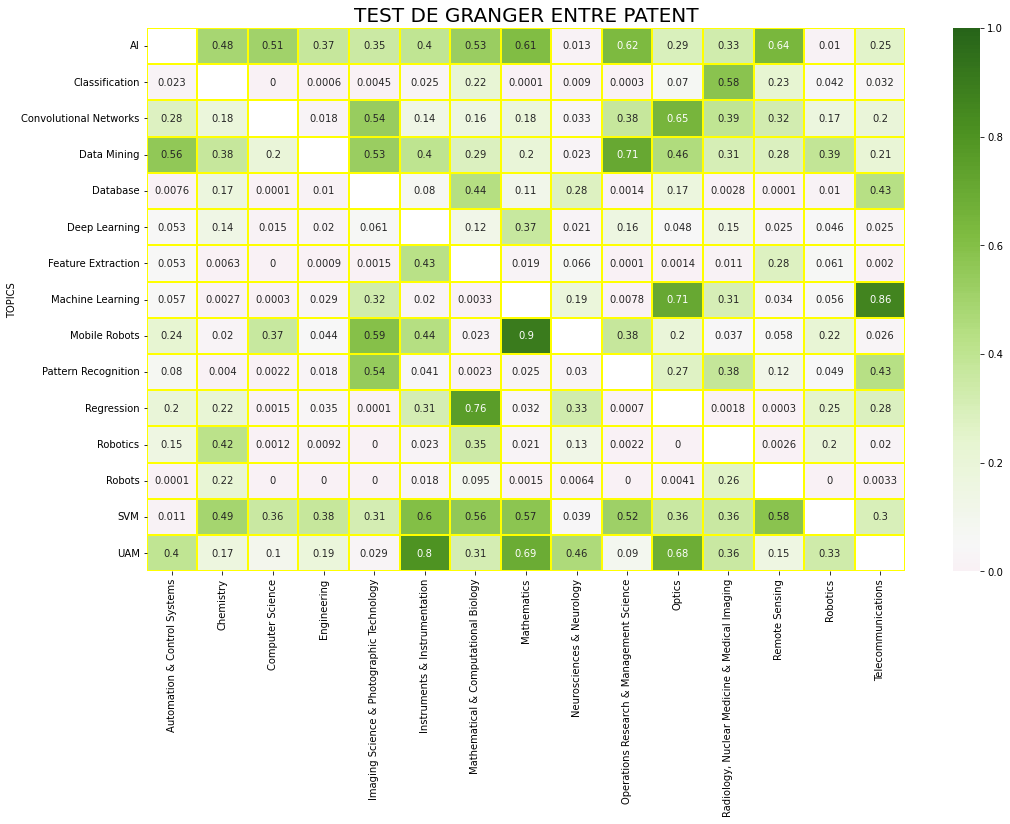

In [231]:
plt.figure(figsize=(17, 10))
plt.title("TEST DE GRANGER ENTRE PATENT", fontsize = 20)
plt.ylabel('SCIENCE')
hm = sns.heatmap(data = grg_cross,
                annot = True,
                linewidths = .2,
                linecolor = "yellow",
                cbar = True,
                 vmax=1,
                center=0.05,
                cmap="PiYG") 
  
plt.show()

In [232]:
model_patent = VAR(df_cross['AU'])
resultats = model_patent.fit(maxlags=0) 
resultats.summary()

C:\Users\33753\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Feb, 2022
Time:                     10:24:49
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    167.557
Nobs:                     15.0000    HQIC:                   166.842
Log likelihood:          -1555.63    FPE:                2.90347e+72
AIC:                      166.849    Det(Omega_mle):     4.47634e+71
--------------------------------------------------------------------
Results for equation Automation & Control Systems
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      8365.333333      3112.072821            2.688           0.007

Results for equation Chemistry
           coefficient       std. error           t-stat            prob
-------------------------------------

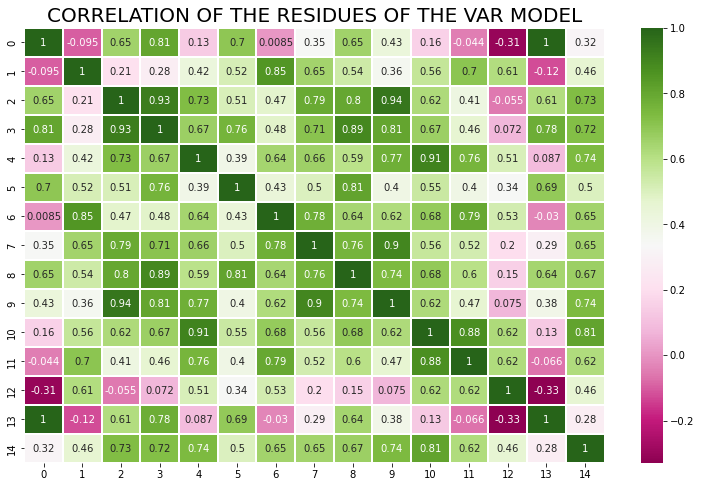

In [233]:
result_var_cross = resultats.resid_corr
# dfp = pd.DataFrame(data = resultats.resid_corr)
# dfp.columns = df_patent.columns
# dfp.index = df_patent.columns

plt.figure(figsize=(13, 8))
plt.title("CORRELATION OF THE RESIDUES OF THE VAR MODEL", fontsize = 20)
hm = sns.heatmap(data = result_var_cross,
                annot = True,
                linewidths = .2,
                cbar = True,
                cmap="PiYG") 
  
plt.show()

In [182]:
type(result_var_cross)

numpy.ndarray

In [237]:
result_var_cross = resultats.resid_corr
grg_cross_var = pd.DataFrame(data = resultats.resid_corr)
grg_cross_var.columns = df_cross['AU'].columns
grg_cross_var.index = df_cross['AU'].index

grg_cross_var.values[[np.arange(grg_cross_var.shape[0])]*2] = np.nan
grg_cross_var.to_csv('grg_cross_var.csv', index = True)

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/699207854.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_cross_var.values[[np.arange(grg_cross_var.shape[0])]*2] = np.nan


# Graphique

# var

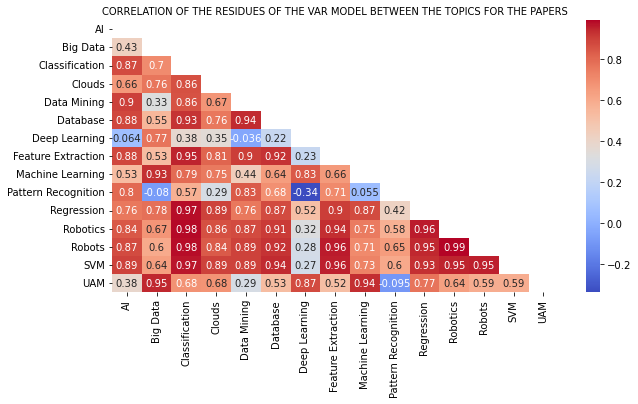

In [264]:
grg_paper_var= pd.read_csv("grg_paper_var.csv")
grg_paper_var.drop('Unnamed: 0', inplace=True, axis =1)
grg_paper_var.index = grg_paper_var.columns
upp_mat = np.triu(grg_paper_var)
plt.figure(figsize=(10,5))
plt.title("CORRELATION OF THE RESIDUES OF THE VAR MODEL BETWEEN THE TOPICS FOR THE PAPERS", fontsize = 10)
sns.heatmap(grg_paper_var, annot = True, cmap = 'coolwarm', mask = upp_mat);

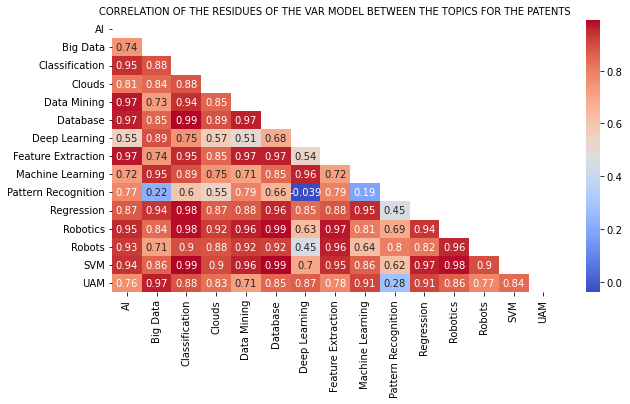

In [266]:
grg_patent_var= pd.read_csv("grg_patent_var.csv")
grg_patent_var.drop('Unnamed: 0', inplace=True, axis =1)
grg_patent_var.index = grg_patent_var.columns
upp_mat = np.triu(grg_patent_var)
plt.figure(figsize=(10,5))
plt.title("CORRELATION OF THE RESIDUES OF THE VAR MODEL BETWEEN THE TOPICS FOR THE PATENTS", fontsize = 10)
sns.heatmap(grg_patent_var, annot = True, cmap = 'coolwarm', mask = upp_mat);

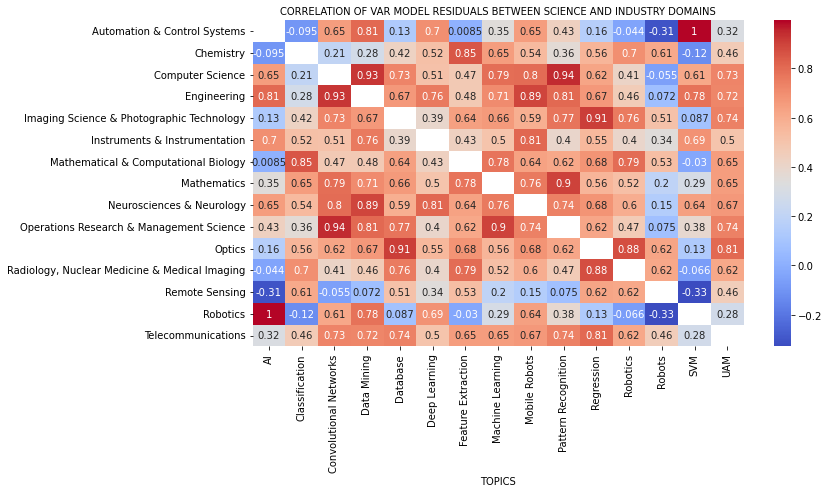

In [389]:
grg_cross_var= pd.read_csv("grg_cross_var.csv")
grg_cross_var.set_index('TOPICS', inplace = True)
#upp_mat = np.triu(grg_cross_var)
plt.figure(figsize=(11,6))
plt.ylabel("INDUSTRY")
plt.title("CORRELATION OF VAR MODEL RESIDUALS BETWEEN SCIENCE AND INDUSTRY DOMAINS", fontsize = 10)
sns.heatmap(grg_cross_var.T, annot = True, cmap = 'coolwarm');
#, mask = upp_mat

# GRANGER

In [317]:
grg_paper = pd.read_csv("grg_paper.csv")
grg_paper.drop('Unnamed: 0', inplace=True, axis =1)
grg_paper.index = grg_paper.columns

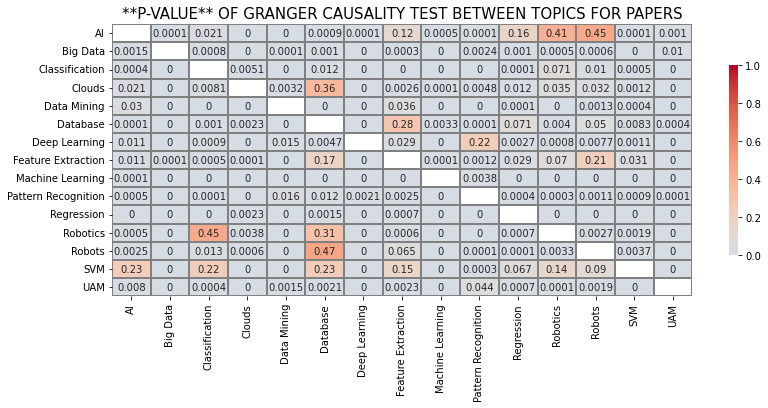

In [352]:
c=sns.color_palette("icefire", as_cmap=True)
plt.figure(figsize=(13, 5))
plt.title("**P-VALUE** OF GRANGER CAUSALITY TEST BETWEEN TOPICS FOR PAPERS", fontsize = 15)
hm = sns.heatmap(data = grg_paper,
                annot = True,
                linewidths = .2,
                linecolor = "gray",
                cmap= 'coolwarm',#'magma', 
                cbar_kws={"shrink": .70},
                cbar = True,
                 vmax=1,
                center=0.05) # p_value "PiYG") 
  
plt.show()

In [328]:
grg_patent = pd.read_csv("grg_patent.csv")
grg_patent.drop('Unnamed: 0', inplace=True, axis =1)
grg_patent.index = grg_patent.columns

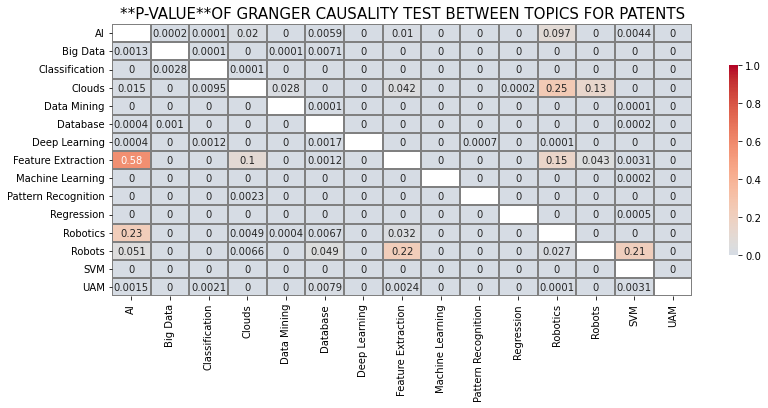

In [353]:
c=sns.color_palette("icefire", as_cmap=True)
plt.figure(figsize=(13, 5))
plt.title("**P-VALUE**OF GRANGER CAUSALITY TEST BETWEEN TOPICS FOR PATENTS", fontsize = 15)
hm = sns.heatmap(data = grg_patent,
                annot = True,
                linewidths = .2,
                linecolor = "gray",
                cmap= 'coolwarm',#'magma', 
                cbar_kws={"shrink": .70},
                cbar = True,
                 vmax=1,
                center=0.05) # p_value "PiYG") 
  
plt.show()

In [336]:
grg_cross = pd.read_csv("grg_cross.csv")
grg_cross.index = grg_cross['TOPICS']

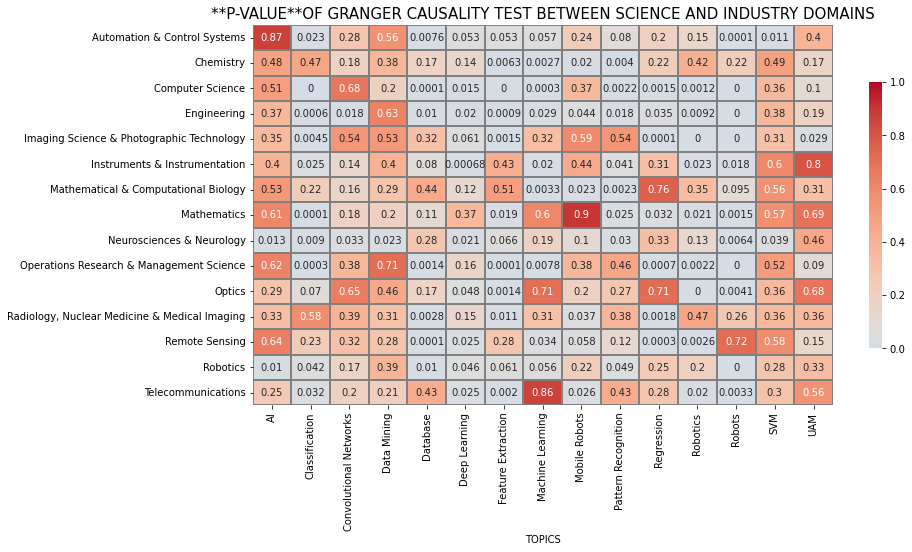

In [390]:
c=sns.color_palette("icefire", as_cmap=True)
plt.figure(figsize=(13, 7))
plt.title("**P-VALUE**OF GRANGER CAUSALITY TEST BETWEEN SCIENCE AND INDUSTRY DOMAINS", fontsize = 15)
hm = sns.heatmap(data = grg_cross.T,
                annot = True,
                linewidths = .2,
                linecolor = "gray",
                cmap= 'coolwarm',#'magma', 
                cbar_kws={"shrink": .70},
                cbar = True,
                 vmax=1,
                center=0.05) # p_value "PiYG") 
  
plt.show()

In [357]:
c = grg_cross

In [364]:
grg_cross.values[[np.arange(grg_cross.shape[0])]*2] = np.random.random(15)

C:\Users\33753\AppData\Local\Temp/ipykernel_23612/2778719190.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grg_cross.values[[np.arange(grg_cross.shape[0])]*2] = np.random.random(15)


In [386]:
grg_cross

,Automation & Control Systems,Chemistry,Computer Science,Engineering,Imaging Science & Photographic Technology,Instruments & Instrumentation,Mathematical & Computational Biology,Mathematics,Neurosciences & Neurology,Operations Research & Management Science,Optics,"Radiology, Nuclear Medicine & Medical Imaging",Remote Sensing,Robotics,Telecommunications
TOPICS,,,,,,,,,,,,,,,
AI,0.868361,0.480600,0.505000,0.374500,0.354600,0.39710,0.530600,0.609400,0.013100,0.624900,0.289500,0.327700,0.642100,0.010200,0.250400
Classification,0.022700,0.467566,0.000000,0.000600,0.004500,0.02530,0.219200,0.000100,0.009000,0.000300,0.070400,0.582800,0.234100,0.041700,0.032400
Convolutional Networks,0.281200,0.184000,0.678678,0.018200,0.536700,0.13720,0.156400,0.185000,0.032700,0.376600,0.648800,0.394500,0.320300,0.175000,0.198500
Data Mining,0.559400,0.376900,0.199000,0.631122,0.529000,0.39960,0.288900,0.200900,0.023400,0.708000,0.457000,0.305400,0.281300,0.389200,0.214200
Database,0.007600,0.173400,0.000100,0.010000,0.315689,0.08000,0.439300,0.111500,0.280800,0.001400,0.172000,0.002800,0.000100,0.010400,0.432100
Deep Learning,0.053100,0.137000,0.014800,0.020200,0.061000,0.00068,0.118100,0.365500,0.021100,0.157800,0.048300,0.145700,0.025200,0.046000,0.024900
Feature Extraction,0.052600,0.006300,0.000000,0.000900,0.001500,0.42550,0.506192,0.018700,0.065900,0.000100,0.001400,0.011000,0.279100,0.061400,0.002000
Machine Learning,0.057000,0.002700,0.000300,0.029100,0.324900,0.02030,0.003300,0.602254,0.189400,0.007800,0.709900,0.308300,0.034400,0.056200,0.861100
Mobile Robots,0.236300,0.019800,0.367600,0.043700,0.593500,0.44340,0.023000,0.898900,0.104262,0.377100,0.195200,0.036600,0.058100,0.220300,0.026100


In [387]:
grg_cross.to_csv('grg_cross.csv', index = True)